<a href="https://colab.research.google.com/github/Maagnitude/coupon-recommend-models/blob/main/coupon_recommend_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Βασική Εργασία** στο μάθημα **Εξόρυξη Δεδομένων**

# **Τμήμα Πληροφορικής και Τηλεματικής - Χαροκόπειο Πανεπιστήμιο**

## **Χαρίτος Δημήτριος -------------------- it21395**
## **Καζάζης Γεώργιος --------------------- it214124**
## **Ζαρρή Σωτηρία Νικολίτσα ------------ it219141**

Στην παρούσα εργασία θα αναπτύξουμε **μοντέλα κατηγοριοποίησης**, για να εξετάσουμε το πρόβλημα του συστήματος **κουπονιών**. Δηλαδή το σε ποιους πιθανούς πελάτες, πρέπει να προσφέρουμε κάποιο κουπόνι, το οποίο πάντα ήταν ένα μεγάλο πρόβλημα, και με τεχνικές **Μηχανικής Μάθησης** θα προσπαθήσουμε να δημιουργήσουμε ένα καλύτερο σύστημα συστάσεων κουπονιών.

Ύστερα θα αναπτύξουμε **μοντέλα συσταδοποίησης**, για να εξετάσουμε και την πλευρά των μοντέλων χωρίς επίβλεψη (**unsupervised**), στην αντιμετώπιση του παρόντος προβλήματος.

**Αρχίζοντας...**

# **Βιβλιοθήκες**
Κάνουμε import τα απαραίτητα **modules**. 
*   Την **pandas** και την **numpy** για την διαχείριση των δεδομένων μας.

*  Την **matplotlib.pyplot** και την **seaborn** για την οπτικοποίηση των δεδομένων μας. **Ιστογράμματα**, **heatmaps** κλπ.

*  Την **missingno** ώστε να οπτικοποιήσουμε το αν υπάρχουν ελλιπείς εγγραφές.

*   Από την **sklearn** κάνουμε import:
      *   Την **linear_model** για να εκπαιδεύσουμε το **Logistic Regression model**.
      *   Την **model_selection** για την εισαγωγή του **train_test_split** για το χώρισμα του train και του test sets.
      *  Από το **neighbors**, βάζω το **KNeighborsClassifier** για την ανάπτυξη ενός kNN μοντέλου.
      *  Από το **metrics**, βάζω το **accuracy_score**.
      *  Την **RandomForestClassifier** για να εκπαιδεύσουμε ένα Random Forest model.
*  Το **tensorflow**, και από αυτό, τα **keras** και **layers** για την ανάπτυξη νευρωνικών δικτύων.

*  Τέλος, κάνουμε import τα **warnings** και τα φιλτράρουμε, ώστε να μην εμφανίζονται.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.impute import SimpleImputer
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from keras import layers

import warnings
warnings.filterwarnings(action='ignore')

# **A) EDA - Preprocessing / Προετοιμασία**
Το **πρώτο μέρος** αφορά την **προετοιμασία** των δεδομένων, από την **φόρτωση** τους, μέχρι τον **καθαρισμό** τους (το **πέταμα** όσων δεν χρειάζονται, την **συμπλήρωση** των τιμών **null** κτλ.), και το **χώρισμα** τους σε **train-test sets**. Επίσης θα υπάρξουν επεξηγηματικά **plots**, όπου χρειάζεται.

## **Φόρτωση του dataset από το csv αρχείο**
Περνάμε το **url** του dataset στην μεταβλητή df με την χρήση της μεθόδου **read_csv**, και εκτυπώνουμε τις 5 πρώτες γραμμές για να δούμε ότι έγιναν όλα σωστά.

Το **url** είναι του **raw dataset** απ το repository μου στο **github**.

In [2]:
url = "https://raw.githubusercontent.com/Maagnitude/coupon_recommend_models/main/in-vehicle-coupon-recommendation.csv"
df = pd.read_csv(url)
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


## **Άλλος τρόπος φόρτωσης (Drive mount)**

In [ ]:
# from google.colab import files
# uploaded = files.upload()
# from google.colab import drive
# drive.mount('/content/drive/')
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/in-vehicle-coupon-recommendation.csv')

## **Σχήμα του Dataframe**. 

Έχουμε ένα **dataframe** σχήματος **12684 x 26**.

**12684 εγγραφές** (δείγματα) και **26 χαρακτηριστικά** (features)

In [ ]:
df.shape

(12684, 26)

## **Ελλιπείς εγγραφές**
Με την χρήση του **df.info()**, παρατηρούμε ότι υπάρχουν **ελλιπείς εγγραφές**. Το χαρακτηριστικό **car** έχει μόνο **108 τιμές** που **δεν είναι null**, από τις **12684**. Το καλύτερο εδώ είναι να **πετάξουμε** αυτό το χαρακτηριστικό μιας και δεν μας προσφέρει κάτι. Ύστερα με την χρήση του **df.isnull().sum()**, θα δούμε ακριβώς πόσες τιμές είναι **null** σε κάθε χαρακτηριστικό. Επίσης οπτικοποιούμε τις ελλιπείς εγγραφές με την χρήση της βιβλιοθήκης **missingno**.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [ ]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

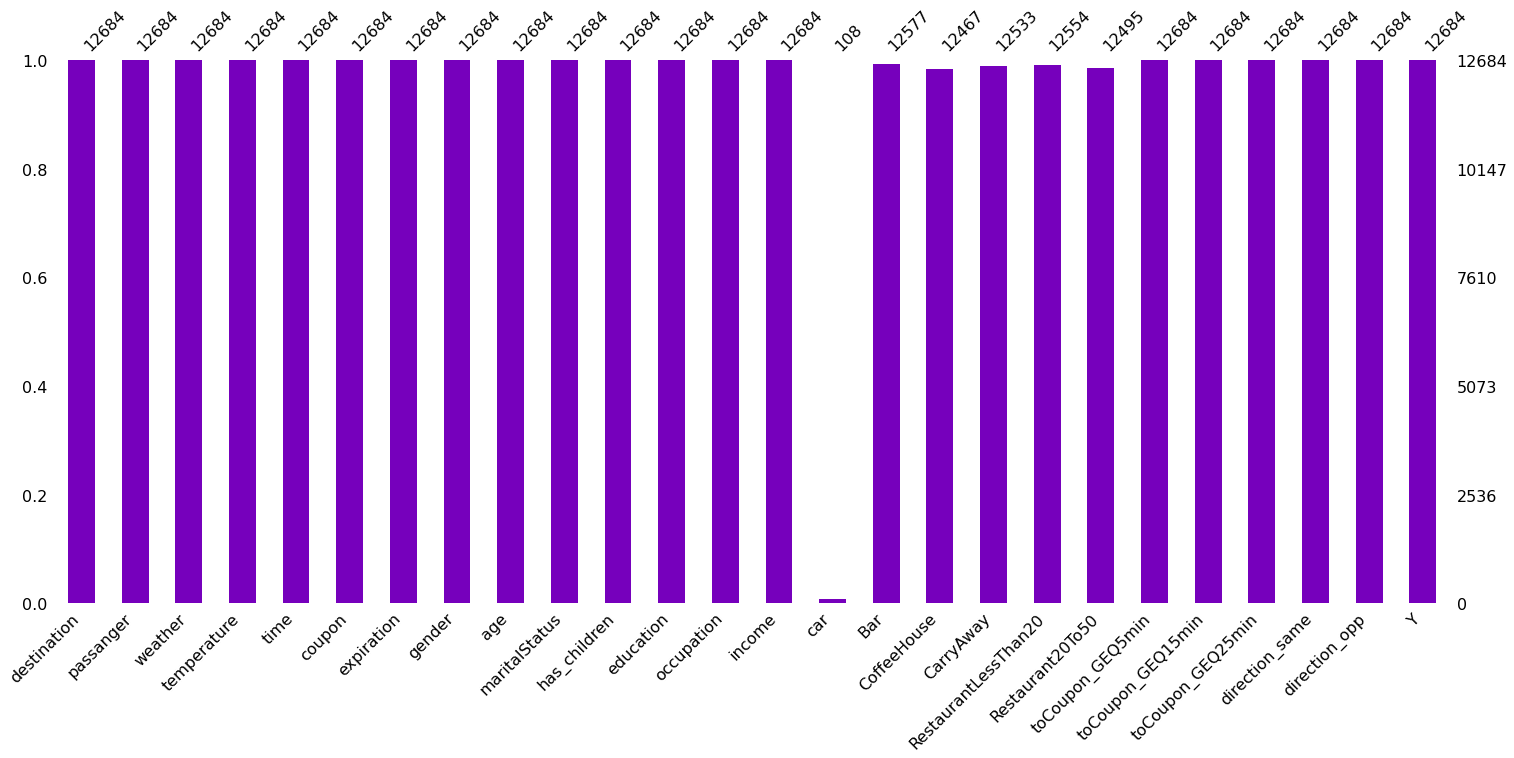

In [3]:
null_plot = msno.bar(df, color="#7600BC")

In [4]:
df= df.drop("car", axis='columns')

## **Imputing**
Εδώ ελέγχουμε τον αριθμό των τιμών για κάθε κατηγορική τιμή. Φαίνεται σαν μια καλή στρατηγική για κάθε τιμή null, να την γεμίζουμε με την τιμή που εμφανίστηκε **πιο συχνά** στις υπόλοιπες εγγραφές (**impute**). 

Ύστερα ελέγχουμε να δούμε ότι δεν υπάρχουν καθόλου null τιμές στις εγγραφές μας με την χρήση της **df.isnull().sum()**.

In [5]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Bar'] = imputer.fit_transform(df['Bar'].values.reshape(-1,1))[:,0]

In [6]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['CoffeeHouse'] = imputer.fit_transform(df['CoffeeHouse'].values.reshape(-1,1))[:,0]

In [7]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['CarryAway'] = imputer.fit_transform(df['CarryAway'].values.reshape(-1,1))[:,0]

In [8]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['RestaurantLessThan20'] = imputer.fit_transform(df['RestaurantLessThan20'].values.reshape(-1,1))[:,0]

In [9]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Restaurant20To50'] = imputer.fit_transform(df['Restaurant20To50'].values.reshape(-1,1))[:,0]

In [ ]:
df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

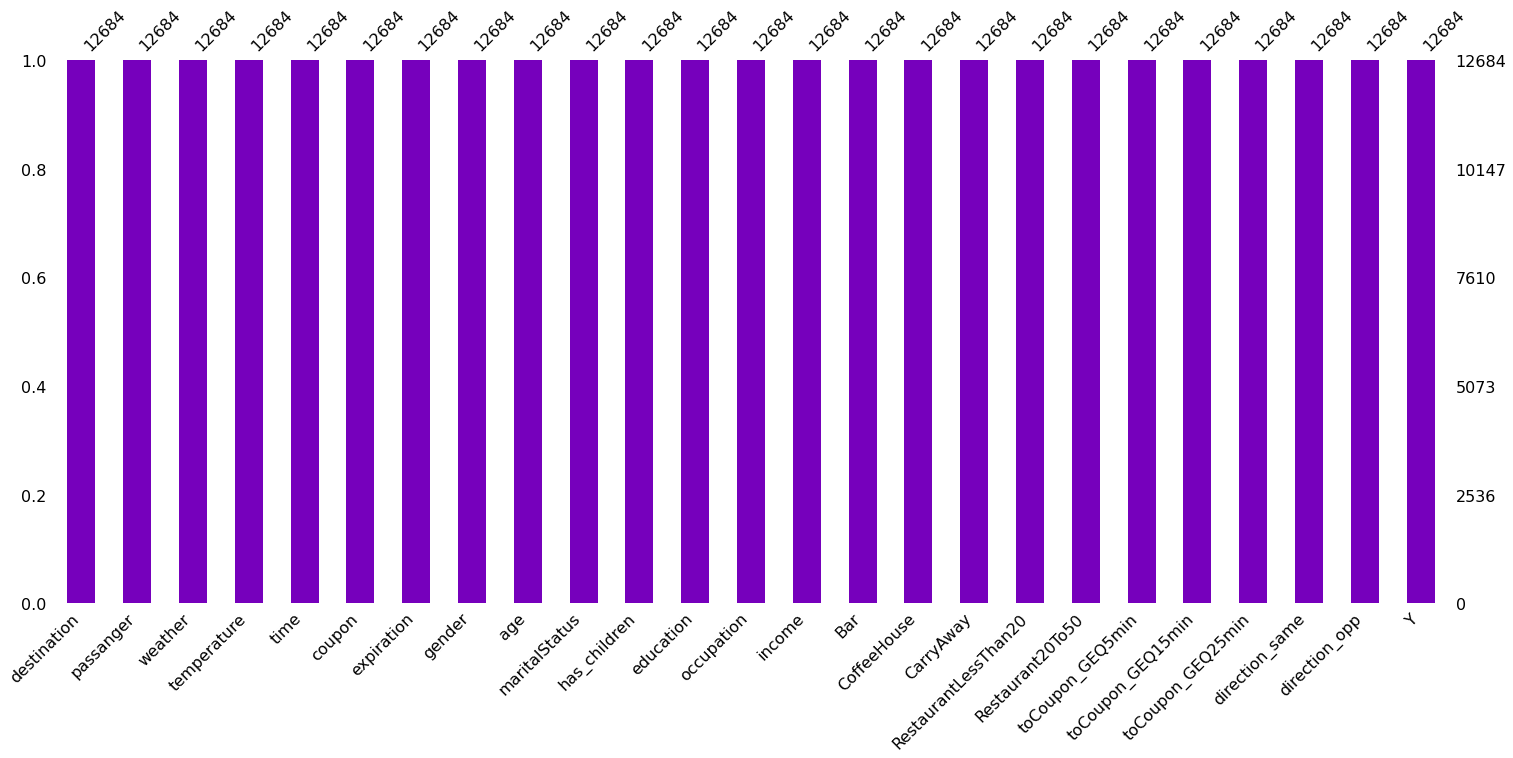

In [ ]:
new_null_plot = msno.bar(df, color="#7600BC")

## **Μοναδικές τιμές**
Ελέγχουμε τις μοναδικές (**διαφορετικές**) τιμές που μπορούν να λάβουν τα ποσοτικά χαρακτηριστικά μας, με την χρήση της **nunique()**, και παρατηρούμε ότι το χαρακτηριστικό "**toCoupon_GEQ5min**" παίρνει μόνο μία τιμή, οπότε δεν το χρειαζόμαστε, και θα το πετάξουμε.

In [10]:
df.select_dtypes('int64').nunique()

temperature          3
has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
dtype: int64

In [11]:
df.drop(columns=['toCoupon_GEQ5min'], inplace=True)

Επίσης τυπώνοντας τον αριθμό της κάθε τιμής που λαμβάνει το "**direction_opp**" και το "**direction_same**", παρατηρούμε ότι στον αριθμό εγγραφών που το ένα έχει **0**, το άλλο έχει **1**, και το αντίστροφο (όπως άλλωστε καταλαβαίνουμε και από την ονομασία του χαρακτηριστικού). Οπότε μας φτάνει να κρατήσουμε το ένα (**direction_same**), γιατί το άλλο είναι **άχρηστη πληροφορία**.

In [ ]:
df['direction_same'].value_counts()

0    9960
1    2724
Name: direction_same, dtype: int64

In [ ]:
df['direction_opp'].value_counts()

1    9960
0    2724
Name: direction_opp, dtype: int64

In [12]:
df.drop(columns=['direction_opp'], inplace=True)

## **Διπλότυπες Εγγραφές**
Ύστερα πετάμε τις **διπλότυπες εγγραφές** (**drop duplicates**) γιατί και δεν μας προσφέρουν κάτι, και μπορεί να **υπερεκπαιδευτούν** (**overfitting**) τα μοντέλα μας.

In [ ]:
df.shape

(12684, 23)

In [13]:
df.drop_duplicates(inplace=True)
df.shape

(12610, 23)

## **Ιστόγραμμα**
Κάνουμε plot το ιστόγραμμα κάθε **ποσοτικού** χαρακτηριστικού ξεχωριστά (και του **label - Y**). Δεν μας βοηθάει ιδιαίτερα μιας και τα **5 από τα 6** ιστογράμματα έχουν ως τιμές τα **0 και 1**, οπότε δεν μπορεί να παρατηρηθεί κάποια ουσιαστική **κατανομή**. Μόνο το ότι το "toCoupon_GEQ25min" έχει πάνω από 10000 εγγραφές με την τιμή 0, και ότι στο "temperature" παρατηρείται **αρνητική ασυμμετρία** (περισσότερες εγγραφές να έχουν την τιμή **80**, λιγότερες την **55** και ακόμα πιο λίγες την **30**) 

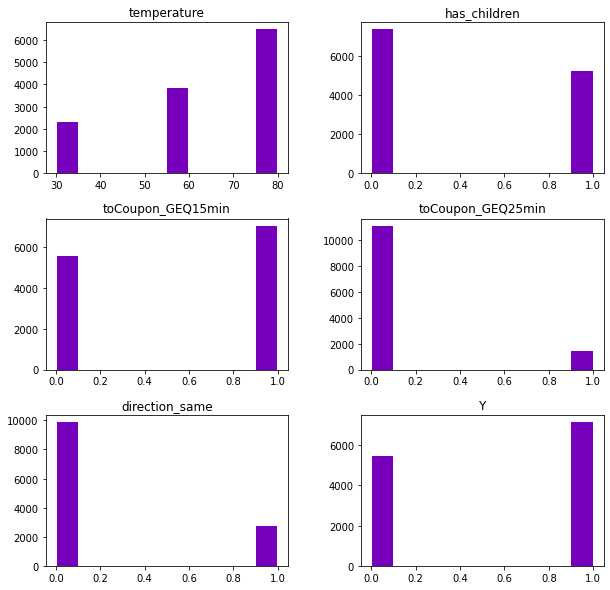

In [ ]:
df_histplot = df.hist(grid=False, figsize=(10,10), color='#7600BC', zorder=2, rwidth=0.95)

## **Describe**
Παρακάτω εμφανίζουμε την στατιστική ανάλυση των ποσοτικών δεδομένων μας, με την χρήση της μεθόδου **describe()**. Το μόνο συμπέρασμα που μπορούμε να βγάλουμε εδώ είναι ότι το ~56.7% του Y είναι 1, με αποτέλεσμα να υπάρχει μία **ανισορροπία** στις κλάσεις μας (0/1), όχι ιδιαίτερα μεγάλη.

Σημ: Με **Transpose (.T)** ο πίνακας είναι πιο ευκρινής.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,12610.0,63.267248,19.153386,30.0,55.0,80.0,80.0,80.0
has_children,12610.0,0.414512,0.492657,0.0,0.0,0.0,1.0,1.0
toCoupon_GEQ15min,12610.0,0.559794,0.496432,0.0,0.0,1.0,1.0,1.0
toCoupon_GEQ25min,12610.0,0.116019,0.320260,0.0,0.0,0.0,0.0,1.0
direction_same,12610.0,0.215543,0.411215,0.0,0.0,0.0,0.0,1.0
Y,12610.0,0.567565,0.495434,0.0,0.0,1.0,1.0,1.0


## **Ετεροσυσχέτιση**
Με την χρήση της συνάρτησης **corr()** της βιβλιοθήκης **pandas**, ελέγχουμε την **ετεροσυσχέτιση** μεταξύ των χαρακτηριστικών. Συγκεκριμένα τυπώνουμε την συσχέτιση όλων των χαρακτηριστικών με το **label** μας - '**Y**', και παρακάτω θα οπτικοποιήσουμε τις συσχετίσεις όλων.

In [14]:
corr = df.corr()
corr['Y']

temperature          0.059393
has_children        -0.045056
toCoupon_GEQ15min   -0.082693
toCoupon_GEQ25min   -0.108139
direction_same       0.014932
Y                    1.000000
Name: Y, dtype: float64

## **Heatmap**
Εδώ οπτικοποιούμε την **ετεροσυσχέτιση** των χαρακτηριστικών. Αυτή η δισδιάστατη αναπαράσταση μας βοηθάει να καταλάβουμε πολύ πιο εύκολα την ετεροσυσχέτιση, μέσω των χρωμάτων, αλλά και των τιμών. Παρατηρούμε όπως και πιο πάνω, ότι μεγαλύτερη συσχέτιση με το **Y** έχει το **toCoupon_GEQ25min** και πιο συγκεκριμένα αρνητική συσχέτιση. (**-0.1**)

Σημ: Είχαμε δει και στο ιστόγραμμα ότι αυτό το χαρακτηριστικό έχει την **τιμή 0** σε **πάνω από 10000 εγγραφές**.

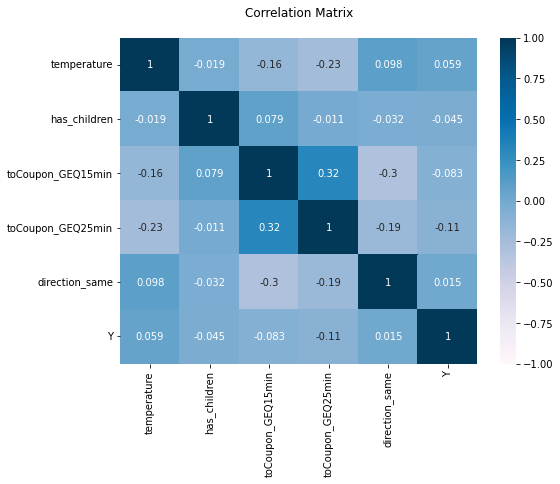

In [15]:
plt.figure(figsize=(8,6))
heat = sns.heatmap(corr, annot=True, vmin=-1.0, cmap='PuBu')
plt.title("Correlation Matrix\n")
plt.show()

## **ONE-HOT ENCODING**

Εν συνεχεία, θα μετατρέψουμε κάθε **κατηγορικό** χαρακτηριστικό σε "**αριθμητικό**" με την χρήση του **one-hot encoding**, δημιουργώντας τόσες στήλες όσες είναι οι διαφορετικές τιμές του χαρακτηριστικού, και δίνοντας του **1** στην στήλη της τιμής που είχε η κάθε εγγραφή, και **0** σε όλες τις υπόλοιπες. (αυτοματοποιημένη διαδικασία)

**object -> uint8**

In [ ]:
df.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
Y                        int64
dtype: object

Παίρνουμε όλα τα **κατηγορικά** (χωρίς τις ποσοτικά) και τα εισάγουμε στην μεταβλητή **df_categorical**. Ύστερα με την χρήση της **get_dummies** των **pandas**, εφαρμόζουμε το **one-hot encoding**. 

Μετά από αυτό τα χαρακτηριστικά μας, από **23**, έχουν γίνει **108** (δηλαδή 108 στήλες), και πλέον μπορούμε να εκπαιδεύσουμε τα μοντέλα μας πάνω σε αυτά.

In [16]:
df_categorical = df.select_dtypes(exclude='number')

In [ ]:
df_categorical.head()

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
0,No Urgent Place,Alone,Sunny,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3
1,No Urgent Place,Friend(s),Sunny,10AM,Coffee House,2h,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3
2,No Urgent Place,Friend(s),Sunny,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3
3,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,2h,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3
4,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,1d,Female,21,Unmarried partner,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3


In [17]:
for value in df_categorical:
  df = pd.get_dummies(df, columns=[value])

In [18]:
df.dtypes

temperature               int64
has_children              int64
toCoupon_GEQ15min         int64
toCoupon_GEQ25min         int64
direction_same            int64
                          ...  
Restaurant20To50_1~3      uint8
Restaurant20To50_4~8      uint8
Restaurant20To50_gt8      uint8
Restaurant20To50_less1    uint8
Restaurant20To50_never    uint8
Length: 108, dtype: object

## **Clustering Dataframe**
Τώρα που το **dataset** μας είναι έτοιμο προς χρήση για **εκπαίδευση**, θα πάρουμε ένα **αντίγραφο** του για να το χρησιμοποιήσουμε στο **Clustering** αργότερα.

In [19]:
cluster_df = df.copy()

## **Second Dataframe**
Επίσης θα πάρουμε κι άλλο ένα **αντίγραφο**, για να το χρησιμοποιήσουμε για το **δεύτερο ερώτημα** που αφορά την εκπαίδευση μοντέλου σε ένα υποσύνολο **5 γνωρισμάτων**.

In [ ]:
sec_df = df.copy()

# **Β) Classification / Κατηγοριοποίηση** 
Στο **δεύτερο μέρος** ακολουθούν οι **εκπαιδεύσεις** και οι **προβλέψεις 6 μοντέλων κατηγοριοποίησης**
* **Logistic Regression**
* **KNN Algorithm**
* **SVM Algorithm**
* **Decision Tree**
* **Random Forest**
* **Naive Bayes**

καθώς κι ενός **Νευρωνικού δικτύου**.

Πρώτα χωρίζουμε το **dataset** σε **train** και **test sets**, με την χρήση της **συνάρτησης** που υλοποιούμε παρακάτω.

## **Συνάρτηση για train-test splitting**
Ορίζουμε την εξής συνάρτηση για όσες φορές χρειαστεί στην εργασία να χωρίσουμε το dataset μας.

In [ ]:
def split_func(split_df):

  # Χωρίζουμε το split_df σε X (features) και y (labels)
  y = split_df['Y']
  X = split_df.drop('Y', axis=1)

  # Χωρίζουμε τα X και y σε train και test set (70%-30%) με random_state=42
  X_train, X_test, y_train, y_test = \
  train_test_split(X, y, train_size=0.7, random_state=42)

  return X_train, X_test, y_train, y_test

## **1. Με χρήση ολόκληρου του dataset**

In [ ]:
X_train, X_test, y_train, y_test = split_func(df)

### **Logistic Regression**
**Train Accuracy Score**: 0.689

**Test Accuracy Score**: 0.693

**AUC-ROC score**: 0.680

**F1 Score**: 0.742

In [ ]:
lr_mod = linear_model.LogisticRegression()
lr_mod.fit(X_train, y_train)

# Πρόβλεψη μοντέλου για το train set
y_trainpred_lr = lr_mod.predict(X_train)
lr_accuracy_train = accuracy_score(y_train, y_trainpred_lr)

# Πρόβλεψη μοντέλου για το test set
y_pred_lr = lr_mod.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)

print(f'Train Accuracy: {lr_accuracy_train:.3f} \
      \nTest Accuracy: {lr_accuracy:.3f}')

Train Accuracy: 0.689       
Test Accuracy: 0.693


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

lr_roc_score = roc_auc_score(y_test, y_pred_lr)
print(f'AUC-ROC Score: {lr_roc_score:.3f}')

AUC-ROC Score: 0.680


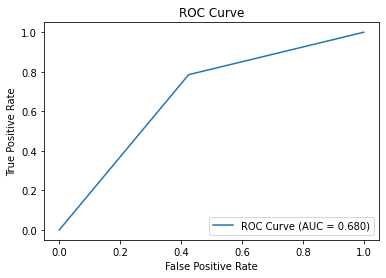

In [ ]:
# Υπολογισμός των ποσοστών ψευδώς θετικών και αληθώς θετικών.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)

# Plot της καμπύλης ROC
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.3f)' % lr_roc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import f1_score

lr_f1 = f1_score(y_test, y_pred_lr)
print(f'F1 Score: {lr_f1:.3f}')

F1 Score: 0.742


### **KNN Algorithm**

**Train Accuracy Score**: 0.727

**Test Accuracy Score**: 0.698

**F1 Score**: 0.754

In [ ]:
knn_mod = KNeighborsClassifier(n_neighbors = 31, metric = 'minkowski', p = 2)
knn_mod.fit(X_train, y_train)

# Πρόβλεψη μοντέλου για το train set
y_trainpred_knn = knn_mod.predict(X_train)
knn_accuracy_train = accuracy_score(y_train, y_trainpred_knn)

# Πρόβλεψη μοντέλου για το test set
y_pred_knn = knn_mod.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

print(f'Train Accuracy: {knn_accuracy_train:.3f} \
      \nTest Accuracy: {knn_accuracy:.3f}')

Train Accuracy: 0.727       
Test Accuracy: 0.698


In [ ]:
knn_f1 = f1_score(y_test, y_pred_knn)
print(f'F1 Score: {knn_f1:.3f}')

F1 Score: 0.747


### **SVM Algorithm**
**Train Accuracy Score**: 0.886

**Test Accuracy Score**: 0.733

**F1 Score**: 0.775

Σημ: **Αργεί** πάρα πολύ η εκπαίδευση του, σε σχέση με τα υπόλοιπα μοντέλα.

In [ ]:
svm_mod = SVC(kernel="rbf", random_state=None, probability=True, cache_size=200, gamma=0.1) 
svm_mod.fit(X_train, y_train)

# Πρόβλεψη μοντέλου για το train set
y_trainpred_svm = svm_mod.predict(X_train)
svm_accuracy_train = accuracy_score(y_train, y_trainpred_svm)

# Πρόβλεψη μοντέλου για το test set
y_pred_svm = svm_mod.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

print(f'Train Accuracy: {svm_accuracy_train:.3f} \
      \nTest Accuracy: {svm_accuracy:.3f}')

Train Accuracy: 0.886       
Test Accuracy: 0.733


In [ ]:
svm_f1 = f1_score(y_test, y_pred_svm)
print(f'F1 Score: {svm_f1:.3f}')

F1 Score: 0.775


### **Decision Tree**
**Train Accuracy Score**: 0.999

**Test Accuracy Score**: 0.678

**F1 Score**: 0.713

In [ ]:
dct_mod = DecisionTreeClassifier()
dct_mod.fit(X_train, y_train)

# Πρόβλεψη μοντέλου για το train set
y_trainpred_dct = dct_mod.predict(X_train)
dct_accuracy_train = accuracy_score(y_train, y_trainpred_dct)

# Πρόβλεψη μοντέλου για το test set
y_pred_dct = dct_mod.predict(X_test)
dct_accuracy = accuracy_score(y_test, y_pred_dct)

print(f'Train Accuracy: {dct_accuracy_train:.3f} \
      \nTest Accuracy: {dct_accuracy:.3f}')

Train Accuracy: 0.999       
Test Accuracy: 0.678


In [ ]:
dct_f1 = f1_score(y_test, y_pred_dct)
print(f'F1 Score: {dct_f1:.3f}')

F1 Score: 0.713


### **Random Forest**
**Train Accuracy Score**: 0.999

**Test Accuracy Score**: 0.755

**F1 Score**: 0.792

Το **καλύτερο** μας μοντέλο, με αρκετά μεγάλη διαφορά σε **accuracy**, καθώς και **πολύ γρήγορο** στην **εκπαίδευση** του.

In [ ]:
rnf_mod =  RandomForestClassifier()
rnf_mod.fit(X_train, y_train)

# Πρόβλεψη μοντέλου για το train set
y_trainpred_rnf = rnf_mod.predict(X_train)
rnf_accuracy_train = accuracy_score(y_train, y_trainpred_rnf)

# Πρόβλεψη μοντέλου για το test set
y_pred_rnf = rnf_mod.predict(X_test)
rnf_accuracy = accuracy_score(y_test, y_pred_rnf)

print(f'Train Accuracy: {rnf_accuracy_train:.3f} \
      \nTest Accuracy: {rnf_accuracy:.3f}')

Train Accuracy: 0.999       
Test Accuracy: 0.755


In [ ]:
rnf_f1 = f1_score(y_test, y_pred_rnf)
print(f'F1 Score: {rnf_f1:.3f}')

F1 Score: 0.792


### **Naive Bayes**
**Train Accuracy Score**: 0.636

**Test Accuracy Score**: 0.638

**F1 Score**: 0.671

In [ ]:
bayes_mod =  GaussianNB()
bayes_mod.fit(X_train, y_train)

# Πρόβλεψη μοντέλου για το train set
y_trainpred_bayes = bayes_mod.predict(X_train)
bayes_accuracy_train = accuracy_score(y_train, y_trainpred_bayes)

# Πρόβλεψη μοντέλου για το test set
y_pred_bayes = bayes_mod.predict(X_test)
bayes_accuracy = accuracy_score(y_test, y_pred_bayes)

print(f'Train Accuracy: {bayes_accuracy_train:.3f} \
      \nTest Accuracy: {bayes_accuracy:.3f}')

Train Accuracy: 0.636       
Test Accuracy: 0.638


In [ ]:
bayes_f1 = f1_score(y_test, y_pred_bayes)
print(f'F1 Score: {bayes_f1:.3f}')

F1 Score: 0.671


### **Neural Network**
**Train accuracy**: 0.875
    
**Test accuracy**: 0.716


In [ ]:
def NeuralN(X_train, X_test, y_train, y_test):

  model = keras.Sequential([
      layers.Input(shape=(X_train.shape[1],), name='input'),
      layers.Dense(100, activation='relu'),
      layers.Dense(100, activation='relu'),
      layers.Dense(100, activation='relu'),
      layers.Dense(100, activation='relu'),
      layers.Dense(3, activation='softmax', name='output')      
  ])

  model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
  )
  model.summary()
  history = model.fit(X_train, y_train, epochs=50, batch_size = 64)
  train_accuracy = model.evaluate(X_train, y_train)
  test_accuracy = model.evaluate(X_test, y_test)

  y_test_c = tf.keras.utils.to_categorical(y_test)

  y_pred = model.predict(X_test)
  pred_idx = np.argmax(y_pred, axis=1)
  true_idx = np.argmax(y_test_c, axis=1)
  tf_confmatrix = tf.math.confusion_matrix(true_idx, pred_idx)

  return train_accuracy, test_accuracy, tf_confmatrix

In [ ]:
nn_train_accuracy, nn_test_accuracy, tf_confmatrix = \
              NeuralN(X_train, X_test, y_train, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               10800     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 output (Dense)              (None, 3)                 303       
                                                                 
Total params: 41,403
Trainable params: 41,403
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
138/138 [==============================] 

In [ ]:
print(f'Train accuracy: {nn_train_accuracy[1]:.3f}\
    \nTest accuracy: {nn_test_accuracy[1]:.3f}')

Train accuracy: 0.875    
Test accuracy: 0.716


In [ ]:
tf_confmatrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1206,  448],
       [ 625, 1504]], dtype=int32)>

### **Πίνακας με όλα τα accuracies**

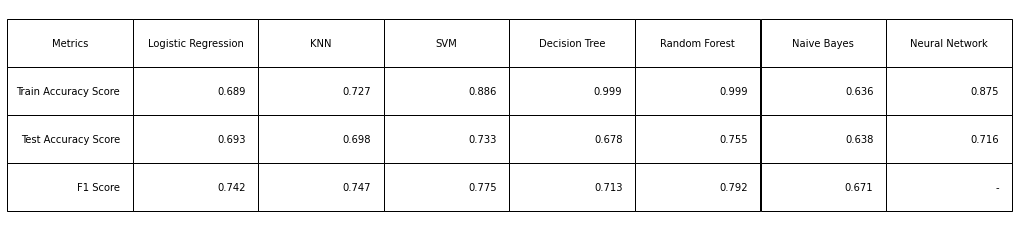

In [ ]:
labels = ['Metrics', 'Logistic Regression', 'KNN', 'SVM', 'Decision Tree',
          'Random Forest', 'Naive Bayes', 'Neural Network']

data = [['Train Accuracy Score', lr_accuracy_train, knn_accuracy_train, svm_accuracy_train,\
         dct_accuracy_train, rnf_accuracy_train, bayes_accuracy_train, nn_train_accuracy[1]],
        [ 'Test Accuracy Score', lr_accuracy, knn_accuracy, svm_accuracy, dct_accuracy, \
                                          rnf_accuracy, bayes_accuracy, nn_test_accuracy[1]],
        [ 'F1 Score', lr_f1, knn_f1, svm_f1, dct_f1, rnf_f1, bayes_f1, '-']]

for i in range(len(data)):
    for j in range(len(data[i])):
        if isinstance(data[i][j], float):
            data[i][j] = round(data[i][j], 3)

data = np.array(data)

# data = np.round(data, 3)
fig, ax = plt.subplots()
table = ax.table(cellText=data, colLabels=labels, loc='center')
table.set_fontsize(20)
table.scale(3,4)
ax.axis('off')
ax.grid(False)

plt.show()

## **2. Με χρήση υποσυνόλου 5 γνωρισμάτων**.
Σε αυτό το μέρος θα πάρουμε το dataframe που είχαμε κρατήσει στην μεταβλητή **sec_df**, το οποίο είναι καθαρό από ελλιπείς εγγραφές, και γνωρίσματα που δεν προσφέρουν πληροφορία, και θα προσπαθήσουμε να επιλέξουμε **5 γνωρίσματα** από αυτό, πάνω στα οποία θα εκπαιδεύσουμε τον καλύτερο μας μοντέλο, δηλαδή το **Random Forest**, και θα σχολιάσουμε τα αποτελέσματα.

Δύο τρόποι που διαλέξαμε για την επιλογή των 5 γνωρισμάτων είναι ο VarianceThreshold και ο SelectKBest, οι οποίοι για να δουλέψουν χρειάζονται ποσοτικά δεδομένα, οπότε θα χρησιμοποιήσουμε το αντίγραφο από το one-hot encoded dataframe, που είχαμε πάρει παραπάνω.

### **SelectKBest**
Σε αυτή τη μέθοδο επιλέγουμε τον **αριθμό των γνωρισμάτων** που θέλουμε να επιλεχθούν, βάζοντας το **k=5**.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X_1 = sec_df.drop(['Y'], axis=1)
y = sec_df['Y']

# Στο k βάζουμε τον αριθμό των γνωρισμάτων που θέλουμε να επιλεχθούν.
selector = SelectKBest(f_classif, k=5)
X_new_1 = selector.fit_transform(X_1, y)

# Παίρνουμε τους δείκτες των γνωρισμάτων που επιλέχθηκαν.
selected_feature_indices = selector.get_support(indices=True)

selected_feature_indices

array([ 6, 20, 21, 24, 26])

In [ ]:
new_sec_df = sec_df.iloc[:, selected_feature_indices]
new_sec_df.head()

,destination_Home,time_7AM,coupon_Bar,coupon_Restaurant(20-50),expiration_1d
0,0,0,0,0,1
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
sec_X_train, sec_X_test, sec_y_train, sec_y_test = \
train_test_split(new_sec_df, y, train_size=0.7, random_state=42)

In [ ]:
sec_rnf_mod =  RandomForestClassifier()
sec_rnf_mod.fit(sec_X_train, sec_y_train)

# Πρόβλεψη μοντέλου στο train set
sec_y_predtrain_rnf = sec_rnf_mod.predict(sec_X_train)
sec_rnf_accuracy_train = accuracy_score(sec_y_train, sec_y_predtrain_rnf)

# Πρόβλεψη μοντέλου στο test set
sec_y_pred_rnf = sec_rnf_mod.predict(sec_X_test)
sec_rnf_accuracy = accuracy_score(sec_y_test, sec_y_pred_rnf)

print(f'Train accuracy: {sec_rnf_accuracy_train:.3f}\
        \nTest accuracy: {sec_rnf_accuracy:.3f}')

Train accuracy: 0.641        
Test accuracy: 0.640


### **VarianceThreshold**
Σε αυτή τη μέθοδο δεν επιλέγουμε εμείς τον αριθμό των γνωρισμάτων αλλά αυτή διώχνει τα γνωρίσματα των οποίων η απόκλιση είναι μεγαλύτερη από το **threshold** που έχουμε ορίσει. Παρατηρήσαμε ότι με **threshold=0.247** μένουν 5 γνωρίσματα, οπότε επιλέγουμε αυτό. 

In [ ]:
from sklearn.feature_selection import VarianceThreshold

X2 = sec_df.drop(['Y'], axis=1)

# Βάζουμε το threshold στο 0.247, για να μείνουν τα 5 γνωρίσματα.
selector = VarianceThreshold(threshold=0.247)
X_new2 = selector.fit_transform(X2)

# Παίρνουμε τους δείκτες των γνωρισμάτων που επιλέχθηκαν.
selected_feature_indices2 = selector.get_support(indices=True)

selected_feature_indices2

array([  0,   6,  27,  28, 105])

In [ ]:
new_sec_df2 = sec_df.iloc[:, selected_feature_indices2]
new_sec_df2.head()

,temperature,destination_Home,expiration_2h,gender_Female,Restaurant20To50_gt8
0,55,0,0,1,0
1,80,0,1,1,0
2,80,0,1,1,0
3,80,0,1,1,0
4,80,0,0,1,0


In [ ]:
sec_X_train2, sec_X_test2, sec_y_train2, sec_y_test2 = \
train_test_split(new_sec_df2, y, train_size=0.7, random_state=42)

In [ ]:
sec_rnf_mod2 =  RandomForestClassifier()
sec_rnf_mod2.fit(sec_X_train2, sec_y_train2)

# Πρόβλεψη μοντέλου στο train set
sec_y_predtrain_rnf2 = sec_rnf_mod2.predict(sec_X_train2)
sec_rnf_accuracy_train2 = accuracy_score(sec_y_train2, sec_y_predtrain_rnf2)

# Πρόβλεψη μοντέλου στο test set
sec_y_pred_rnf2 = sec_rnf_mod2.predict(sec_X_test2)
sec_rnf_accuracy2 = accuracy_score(sec_y_test2, sec_y_pred_rnf2)

print(f'Train accuracy: {sec_rnf_accuracy_train2:.3f}\
        \nTest accuracy: {sec_rnf_accuracy2:.3f}')

Train accuracy: 0.604        
Test accuracy: 0.614


# **Γ) Clustering / Συσταδοποίηση**
Στο **τρίτο και τελευταίο μέρος** θα αναπτυχθούν μοντέλα **συσταδοποίησης** και θα **εκπαιδευτούν** στο ήδη **καθαρισμένο** (από το **A μέρος**) **dataset** μας.

In [39]:
cluster_df.head()

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,...,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,55,1,0,0,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
1,80,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,80,1,1,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,80,1,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,80,1,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [20]:
cluster_df.shape

(12610, 108)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_cluster_df = scaler.fit_transform(cluster_df)

## **PCA**
Επειδή έχουμε πάρα πολλά γνωρίσματα (**108 γνωρίσματα = 108 διαστάσεις**) και δεν μπορούμε να τα κάνουμε **plot** στον δισδιάστατο χώρο, θα χρησιμοποιήσουμε την τεχνική **επιλογής χαρακτηριστικών PCA** (**Ανάλυση κύριων συνιστωσών**) για να **μειώσουμε τη διαστατικότητα** των δεδομένων. Η **PCA** είναι μία τεχνική **χωρίς επίβλεψη** και δεν θα λάβει υπόψη τις ετικέτες των δεδομένων ("**Y**"), αλλά μπορεί να χρησιμοποιηθεί για να κάνει τη διαδικασία της συσταδοποίησης **πιο αποδοτική από υπολογιστική άποψη**. Να σημειωθέι ότι έχουμε την δυνατότητα να καθορίσουμε τον **αριθμό των συνιστωσών** που θέλουμε να διατηρήσουμε.

Επίσης η τεχνική αυτή συνίσταται με χρήση της **StandardScaler()** μιας και τα αποτελέσματα της είναι **πολύ ευαίσθητα** στην **κλιμάκωση των δεδομένων**. Βέβαια τα γνωρίσματα των δειγμάτων μας, πέραν του **temperature**, παίρνουν **τιμές 0 και 1**, οπότε **δεν θα χρειαστεί** η εφαρμογή του **StandardScaler()**.

In [122]:
from sklearn.decomposition import PCA

# Δημιουργία αντικειμένου PCA με το επιθυμητό πλήθος συνιστωσών.
pca = PCA(n_components=2)

# Μετασχηματισμός δεδομένων με χρήση του αντικειμένου PCA.
cluster_df_pca = pca.fit_transform(scaled_cluster_df)


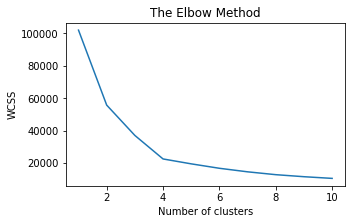

In [41]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(cluster_df_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(cluster_df_pca)

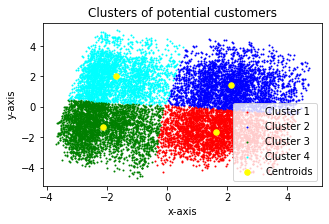

In [43]:
plt.scatter(cluster_df_pca[y_kmeans == 0, 0], cluster_df_pca[y_kmeans == 0, 1], s = 1, c = 'red', label = 'Cluster 1')
plt.scatter(cluster_df_pca[y_kmeans == 1, 0], cluster_df_pca[y_kmeans == 1, 1], s = 1, c = 'blue', label = 'Cluster 2')
plt.scatter(cluster_df_pca[y_kmeans == 2, 0], cluster_df_pca[y_kmeans == 2, 1], s = 1, c = 'green', label = 'Cluster 3')
plt.scatter(cluster_df_pca[y_kmeans == 3, 0], cluster_df_pca[y_kmeans == 3, 1], s = 1, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of potential customers')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import silhouette_score

# Πρόβλεψη των labels συστάδων για κάθε data point
cluster_pred = kmeans.predict(cluster_df_pca)

# Υπολογισμός του silhouette score
score = silhouette_score(cluster_df_pca, cluster_pred)

print("Silhouette score: {:.3f}".format(score))

Silhouette score: 0.454


In [45]:
from sklearn.metrics import calinski_harabasz_score

# Υπολογισμός του Calinski-Harabasz Index
ch_index = calinski_harabasz_score(cluster_df_pca, cluster_pred)
print("Calinski-Harabasz Index:", ch_index)

Calinski-Harabasz Index: 14843.487112840401


## **DBSCAN Clustering**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise):
είναι ένας αλγόριθμος κλαστερισμού βασισμένος στην πυκνότητα που ομαδοποιεί συνοδευόμενα σημεία δεδομένων που βρίσκονται πολύ κοντά. Η βασική ιδέα πίσω από τον αλγόριθμο είναι ότι οι πυκνές περιοχές στα δεδομένα θα πρέπει να ομαδοποιούνται μαζί ως κλάσεις, ενώ οι σπασμένες περιοχές θα πρέπει να θεωρούνται ως θόρυβος.
- eps: είναι η μέγιστη απόσταση μεταξύ δύο δειγμάτων για να μπορούν να θεωρηθούν ότι ανήκουν στο ίδιο neighborhood.
- min_points: είναι ο αριθμός των δειγμάτων σε ένα neighborhood για να θεωρηθεί ένα σημείο core point.

To calculate the value of Eps, we shall calculate the distance between each data point to its closest neighbor using the Nearest Neighbours. After that, we sort them and finally plot them. From the plot, we identify the maximum value at the curvature of the graph. This value is our Eps.

In [123]:
cluster_df_pca.shape

(12610, 2)

In [124]:
from sklearn.neighbors import NearestNeighbors

# Δημιουργία αντικειμένου 
neighb = NearestNeighbors(n_neighbors=2)

# Εκπαίδευση μοντέλου στο dataset
nbrs=neighb.fit(cluster_df_pca)

# Υπολογισμός των πιο κοντινών γειτόνων
distances,indices=nbrs.kneighbors(cluster_df_pca)

Ταξινόμηση και σχεδίαση των αποστάσεων μεταξύ των σημείων

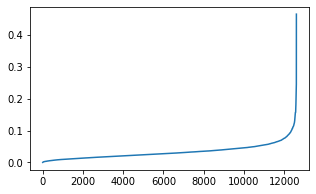

In [125]:
# Ταξινόμηση και σχεδίαση των αποστάσεων
distances = np.sort(distances, axis = 0)

# Παίρνουμε την δεύτερη στήλη των ταξ. αποστάστων
distances = distances[:, 1]
plt.rcParams['figure.figsize'] = (5,3)
plt.plot(distances)
plt.show()

Από το παραπάνω σχεδιάγραμμα παρατηρούμε ότι η μέγιστη καμπυλότητα βρίσκεται στο σημείο τρία, άρα έχουμε:
* eps = 3.
* επίσης min_points = dimensions * 2 = 4

In [127]:
from sklearn.cluster import DBSCAN

# Ορίζουμε τις παραμέτρους
eps = 0.15
min_points = 4

# Εκπαιδεύουμε το μοντέλο
dbscan = DBSCAN(eps=eps, min_samples=min_points).fit(cluster_df_pca)

# Παίρνουμε τα labels
labels = dbscan.labels_ 

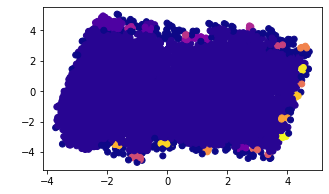

In [128]:
# Plot the clusters
plt.scatter(cluster_df_pca[:, 0], cluster_df_pca[:,1], c = labels, cmap= "plasma")
plt.xlabel("") # X-axis label
plt.ylabel(" ") # Y-axis label
plt.show() # showing the plot

Silhouette Score: Αυτή η μετρική μετράει την ομοιότητα του κάθε στοιχείου με τη δική του συστάδα σε σύγκριση με τις άλλες συστάδες. Κυμαίνεται απο -1 έως 1, με το 1 να υποδηλώνει τέλειο clustering και το -1 χαμηλού βαθμού clustering.

In [131]:
# Υπολογισμός silhouette score
silhouette_score(cluster_df_pca, labels)

-0.37306527769889747

Το Calinski-Harabasz Index, γνωστό και σαν Variance Ratio Criteria, χρησιμοποιείται συνήθως σαν μετρική εκτίμησης για την μέτρηση της ποιότητας του clustering. Χρησιμοποιεί την διακύμανση μεταξύ συστάδων με τη διακύμανση εντός συστάδας. Όσο πιο υψηλή τιμή τόσο καλύτερο το clustering.

In [132]:
# Υπολογισμός του Calinski-Harabasz Index
ch_index = calinski_harabasz_score(cluster_df_pca, labels)
print("Calinski-Harabasz Index:", ch_index)

Calinski-Harabasz Index: 23.363703029339568
